In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
# import dataset
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile.csv")
user_profile

,Unnamed: 0,event_source.hash,ONNET_OUTGOING_Categorical,ONNET_OUTGOING_Scaled,ONNET_OUTGOING_Outlier,ONNET_INCOMING_Categorical,ONNET_INCOMING_Scaled,ONNET_INCOMING_Outlier,OFFNET_OUTGOING_Categorical,OFFNET_OUTGOING_Scaled,...,ONNET_Overall_Categorical,OFFNET_Overall_Categorical,IDD_Overall_Categorical,VOICE_Categorical,Play_Type,Play_Usage,Voice_Packages,Other_Packages,Household_Types,Having_Insurance
0,0,00221451f705ebe26051158bb14f567a,LOW,0.009321,NO,LOW,0.017514,NO,LOW,0.048813,...,LOW,LOW,NO,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO
1,1,002fb47f60400713c854b0f69ff78c0a,LOW,0.051339,NO,LOW,0.056319,NO,LOW,0.053424,...,LOW,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO
2,2,00567a4a3c474aca1ce5cd6570648932,LOW,0.002404,NO,LOW,0.001374,NO,LOW,0.003606,...,LOW,LOW,NO,LOW,TRIPLE_PLAY,"['VOICE_LOW', 'BB_MEDIUM', 'TV_MEDIUM']",NO,NO,NO,NO
3,3,00724ae2470df1ed0fe919800d02517d,LOW,0.003140,NO,LOW,0.002747,NO,LOW,0.004808,...,LOW,LOW,NO,LOW,DOUBLE_PLAY,"['VOICE_LOW', 'BB_LOW', 'TV_NO']",NO,NO,NO,NO
4,4,007400db8afa996e788d23986739f3db,LOW,0.025755,NO,LOW,0.017857,NO,LOW,0.039197,...,LOW,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,3302,ffb4fa6778bc5b3d9c858f5f4fa1e0c2,LOW,0.053964,NO,MEDIUM,0.080529,NO,LOW,0.018029,...,LOW,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO
3303,3303,ffb63ff99cf1354dff1da862f379da80,MEDIUM,0.227924,NO,MEDIUM,0.173935,NO,HIGH,0.334012,...,MEDIUM,HIGH,NO,MEDIUM,SINGLE_PLAY,"['VOICE_MEDIUM', 'BB_NO', 'TV_NO']",NO,NO,NO,NO
3304,3304,ffd697d66cc01c8897ce3e37d693673a,LOW,0.002943,NO,LOW,0.005495,NO,LOW,0.001202,...,LOW,LOW,NO,LOW,DOUBLE_PLAY,"['VOICE_LOW', 'BB_LOW', 'TV_NO']",NO,NO,NO,NO
3305,3305,ffd96f173d6cd683bf3384bdc2f99713,MEDIUM,0.213108,NO,MEDIUM,0.203984,NO,MEDIUM,0.196281,...,MEDIUM,MEDIUM,MEDIUM,MEDIUM,SINGLE_PLAY,"['VOICE_MEDIUM', 'BB_NO', 'TV_NO']",NO,NO,NO,NO


In [3]:
data=user_profile.iloc[:,[1,3,6,9,12,15,18,22,24,30]]
data

,event_source.hash,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,Play_Type
0,00221451f705ebe26051158bb14f567a,0.009321,0.017514,0.048813,0.085835,0.000000,0.000000,0.0000,0.000000,SINGLE_PLAY
1,002fb47f60400713c854b0f69ff78c0a,0.051339,0.056319,0.053424,0.079989,0.014423,0.000000,0.0000,0.000000,SINGLE_PLAY
2,00567a4a3c474aca1ce5cd6570648932,0.002404,0.001374,0.003606,0.002404,0.000000,0.000000,0.6500,0.619792,TRIPLE_PLAY
3,00724ae2470df1ed0fe919800d02517d,0.003140,0.002747,0.004808,0.010817,0.000000,0.000000,0.0000,0.031250,DOUBLE_PLAY
4,007400db8afa996e788d23986739f3db,0.025755,0.017857,0.039197,0.081363,0.043269,0.004808,0.0000,0.000000,SINGLE_PLAY
...,...,...,...,...,...,...,...,...,...,...
3302,ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0.053964,0.080529,0.018029,0.011332,0.006410,0.000000,0.0000,0.000000,SINGLE_PLAY
3303,ffb63ff99cf1354dff1da862f379da80,0.227924,0.173935,0.334012,0.147142,0.000000,0.000000,0.0000,0.000000,SINGLE_PLAY
3304,ffd697d66cc01c8897ce3e37d693673a,0.002943,0.005495,0.001202,0.012019,0.000000,0.000000,0.0000,0.013889,DOUBLE_PLAY
3305,ffd96f173d6cd683bf3384bdc2f99713,0.213108,0.203984,0.196281,0.135744,0.110577,0.272436,0.0000,0.000000,SINGLE_PLAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_source.hash       3307 non-null   object 
 1   ONNET_OUTGOING_Scaled   3307 non-null   float64
 2   ONNET_INCOMING_Scaled   3307 non-null   float64
 3   OFFNET_OUTGOING_Scaled  3307 non-null   float64
 4   OFFNET_INCOMING_Scaled  3307 non-null   float64
 5   IDD_INCOMING_Scaled     3307 non-null   float64
 6   IDD_OUTGOING_Scaled     3307 non-null   float64
 7   PEO_TV_Scaled           3307 non-null   float64
 8   BB_Scaled               3307 non-null   float64
 9   Play_Type               3307 non-null   object 
dtypes: float64(8), object(2)
memory usage: 258.5+ KB


In [5]:
# total number of unique users
data['event_source.hash'].nunique()


3307

In [6]:
# total number of unique peo tv package
data['Play_Type'].nunique()


3

In [7]:
data_dim=data.iloc[:,[1,2,3,4,5,6,7,8]]

## Dimension reduction for usage columns - Applying PCA

### Find most approporiate no of components

In [8]:
pc=PCA(n_components=8) 
pc.fit(data_dim)

PCA(n_components=8)

In [9]:
#How much variance,caputured individually
pc.explained_variance_

array([0.12265956, 0.04572933, 0.03262162, 0.01270919, 0.00629117,
       0.00424571, 0.00326471, 0.00140476])

In [10]:
#How mucb variance, captured together
pc.explained_variance_ratio_.cumsum()

array([0.53580429, 0.73556019, 0.87805869, 0.93357525, 0.9610565 ,
       0.9796027 , 0.99386368, 1.        ])

/home/chiran/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


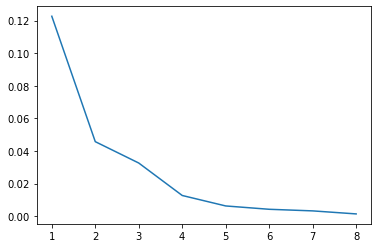

In [11]:
sns.lineplot(range(1,1+pc.explained_variance_.shape[0]),pc.explained_variance_)
plt.show()

### reducing to most appropriate component

In [12]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca = PCA(n_components=1)
pca.fit(data_dim)
reduced_data = pca.fit_transform(data_dim)
results_df = pd.DataFrame(reduced_data,columns=['usage'])

In [13]:
# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_df[['usage']] = scaler.fit_transform(results_df[['usage']])

In [14]:
data=pd.concat([data,results_df],axis=1)

In [15]:
data.drop(["ONNET_OUTGOING_Scaled","ONNET_INCOMING_Scaled","OFFNET_OUTGOING_Scaled","OFFNET_INCOMING_Scaled","IDD_INCOMING_Scaled","IDD_OUTGOING_Scaled","PEO_TV_Scaled","BB_Scaled"],axis=1,inplace=True)
data

,event_source.hash,Play_Type,usage
0,00221451f705ebe26051158bb14f567a,SINGLE_PLAY,0.002049
1,002fb47f60400713c854b0f69ff78c0a,SINGLE_PLAY,0.002832
2,00567a4a3c474aca1ce5cd6570648932,TRIPLE_PLAY,0.665344
3,00724ae2470df1ed0fe919800d02517d,DOUBLE_PLAY,0.009020
4,007400db8afa996e788d23986739f3db,SINGLE_PLAY,0.002119
...,...,...,...
3302,ffb4fa6778bc5b3d9c858f5f4fa1e0c2,SINGLE_PLAY,0.001719
3303,ffb63ff99cf1354dff1da862f379da80,SINGLE_PLAY,0.008527
3304,ffd697d66cc01c8897ce3e37d693673a,DOUBLE_PLAY,0.004189
3305,ffd96f173d6cd683bf3384bdc2f99713,SINGLE_PLAY,0.008591


## Interaction Matrix

In [16]:
# int_mat = data.groupby(["Phone_Number.hash","Peo_TV_Package"])["Usage_Rating_Scaled"].sum().unstack()

In [17]:
# create the user item matrix using the ratings dataset - Hint: try using pivot function 
interactions_metrix = data.pivot_table(index="event_source.hash", columns="Play_Type", values="usage")
interactions_metrix

Play_Type,DOUBLE_PLAY,SINGLE_PLAY,TRIPLE_PLAY
event_source.hash,,,
00221451f705ebe26051158bb14f567a,NaN,0.002049,NaN
002fb47f60400713c854b0f69ff78c0a,NaN,0.002832,NaN
00567a4a3c474aca1ce5cd6570648932,NaN,NaN,0.665344
00724ae2470df1ed0fe919800d02517d,0.009020,NaN,NaN
007400db8afa996e788d23986739f3db,NaN,0.002119,NaN
...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,NaN,0.001719,NaN
ffb63ff99cf1354dff1da862f379da80,NaN,0.008527,NaN
ffd697d66cc01c8897ce3e37d693673a,0.004189,NaN,NaN


In [18]:
interactions_metrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3307 entries, 00221451f705ebe26051158bb14f567a to ffee845c0caa320b55e31bb156827d16
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DOUBLE_PLAY  1025 non-null   float64
 1   SINGLE_PLAY  1663 non-null   float64
 2   TRIPLE_PLAY  619 non-null    float64
dtypes: float64(3)
memory usage: 103.3+ KB


In [19]:
# replace all the missing values with zero
interactions_metrix = interactions_metrix.fillna(0)

In [20]:
interactions_metrix.sample(n=10)

Play_Type,DOUBLE_PLAY,SINGLE_PLAY,TRIPLE_PLAY
event_source.hash,,,
dc300a3920dd6a7461fe5728ec6a88d9,0.000000,0.015446,0.000000
9924efa04013bbed8383136ac2fcaa8a,0.127669,0.000000,0.000000
7a620d1355843d5a255d44aa99e6a6dc,0.000000,0.000022,0.000000
4e08742330209501d7c456dc297c5325,0.000000,0.006341,0.000000
8cc2085e88a28c00e6b32b699ad7363e,0.108158,0.000000,0.000000
ef74b1171331411a4d2e9fada9158215,0.000000,0.000000,0.886118
2d5caf7a3c023840f4321a33bcaef9a8,0.000000,0.008313,0.000000
3989bbb538e5c814f203867e66800e30,0.046307,0.000000,0.000000
c186b34020d0ef7647c6e32d1761603a,0.000000,0.006259,0.000000


## Finding similar users

In [21]:
users = data["event_source.hash"].values

In [22]:
# using cosine_similarity from sklearn
def similar_users(user_id, interactions_matrix):
    
    # compute similarity of each user to the provided user
    similarity = []
    for user in users:
        sim = cosine_similarity([interactions_metrix.loc[user_id]], [interactions_metrix.loc[user]])
        similarity.append((user, sim))
    
    # sort by similarity
    similarity.sort(key=lambda x: x[1], reverse=True)
    
    # create list of just the user ids
    most_similar_users = [tup[0] for tup in similarity]
    
    # create list of similarity score
    similarity_score = [tup[1] for tup in similarity]
    
    # remove the user's own id
    most_similar_users.remove(user_id)
    
    # remove the user's own similarity score
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

In [23]:
# check the implemented function above 
#[0] is here to get first returned element of the function (most_similar_users)
#[:10] is to get the first 10 (the 10 most) similar users
similar_users = similar_users("6eb7c7e72cb90d69c265a98a69d7e377", interactions_metrix)[:10]


In [28]:
similar_users[0][:10]

['00724ae2470df1ed0fe919800d02517d',
 '00a8c3e3baed0557c31ab9b68a086ed2',
 '00c67d66625de3ab6a003af1935c53bc',
 '00cdc20b1406e0a11c7500d5ef716d20',
 '00cdeaab12b17d169d170538c9af9594',
 '00d1f690ec4af27702febbd0db6942c2',
 '00f9d91d2fbd14503d108b2e4e27a96d',
 '0114c953f918a091d5b1456b610ae529',
 '011adeeaef79aeac706a2e7fc225e8f8',
 '013736757d2ddad83cdfaa418921605c']

In [165]:
# this gives similarity scores ( how similar a user to a given user)
similar_users('6eb7c7e72cb90d69c265a98a69d7e377', interactions_metrix)[1][:10]


[array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]])]

## similarity based collaborative recommendation system

In [166]:
# Business Rule -> Single  Play canot be recommended to a Double Play / Triple Play user
def play_rule(already_interacted):
    for s in already_interacted.copy():
        if "DOUBLE_PLAY" in s or "TRIPLE_PLAY" in s:
            already_interacted.add("SINGLE_PLAY")
    return already_interacted

In [167]:
# test 1
play_rule(set(["TRIPLE_PLAY"]))

{'SINGLE_PLAY', 'TRIPLE_PLAY'}

In [168]:
def recommendations(user_id, num_of_packages, user_item_interactions):
    # find the most similar users to the user_id for which we want to recommend packages
    most_similar_users = similar_users(user_id, user_item_interactions)[0]
    
    # find out those packages which this user has already interacted with
    packages = set(list(interactions_metrix.columns[np.where(interactions_metrix.loc[user_id]>0)]))
    
    # create an empty list to store the recommended packages
    recommendations = []
    
    # copy those packages which are already interacted by user_id
    already_interacted = packages.copy()
    
    # loop through each similar user from the list of most_similar_users
    for similar_user in most_similar_users:
        
        # implement the below code till the length of recommended packages does not become equal to num_of_packages
        if len(recommendations) < num_of_packages:
            
            # store all the movies interacted by each similar user to user_id
            similar_user_packages = set(list(interactions_metrix.columns[np.where(interactions_metrix.loc[similar_user]>0)]))
            
            # applying business rule
            already_interacted= play_rule(already_interacted)
            
            # add those packages in the recommended list which are present in similar_user_packages but not present in already_interacted
            recommendations.extend(list(similar_user_packages.difference(already_interacted)))
            
            # now add all those packages into already_interacted which we already added in recommendations
            already_interacted = already_interacted.union(similar_user_packages)
            
        else:
            break
    
    return recommendations[:num_of_packages]

In [170]:
# data[(data["Play_Type"] == "DOUBLE_PLAY")].sample(n=10)

In [171]:
# check recommendations
recommendations('9a1b979ed06c0f72e19c7943dfd12887',1, interactions_metrix)

['TRIPLE_PLAY']

In [172]:
# check recommendations
recommendations('b05e755cb2ca2e36cd39873f14a4280f',1, interactions_metrix)

['TRIPLE_PLAY']

## Evaluation